In [1]:
import numpy as np 
from numpy import cov
import pandas as pd
from pandas import set_option
import csv
import re 
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.utils.testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyRegressor
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
import pickle

D:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
# Load data
df = pd.read_csv('car.csv', delimiter='|',engine='python',error_bad_lines=False,warn_bad_lines=False, index_col=False,encoding='utf8')

In [3]:
print('The dataset has {} instances and {} attributes.\n'.format(df.shape[0], df.shape[1]))
print('The attributes are : \n {} '.format(df.dtypes))

set_option('display.width', 100)
print('The first 5 rows:\n{}'.format(df.head(5)))
print('The last 5 rows:\n{}'.format(df.tail(5)))

The dataset has 39422 instances and 18 attributes.

The attributes are : 
 car_model      object
km             object
imp_exp        object
km_1           object
imp_exp_1      object
car_type       object
out_color      object
in_color       object
door_num       object
seat_num       object
new_old        object
car_year       object
title          object
price          object
area           object
poster_name    object
poster_add     object
poster_tel     object
dtype: object 
The first 5 rows:
   car_model        km    imp_exp      km_1  imp_exp_1 car_type out_color   in_color door_num  \
0  acura-mdx      0 Km  Nhập khẩu      0 Km  Nhập khẩu      SUV       Đen        Đen    5 cửa   
1  acura-mdx      0 Km  Nhập khẩu      0 Km  Nhập khẩu      SUV       Bạc        Đen    5 cửa   
2  acura-mdx      0 Km  Nhập khẩu      0 Km  Nhập khẩu      SUV       Bạc  Nhiều màu    5 cửa   
3  acura-mdx      0 Km  Nhập khẩu      0 Km  Nhập khẩu      SUV       Đen        Kem    5 cửa   
4  acura-md

In [4]:
price_list = []

for x in df['price']:
    word = []
    number = re.findall('\d+',x)
    word = re.findall(r'Tỷ',x)
    if (len(number) == 2):
        a = int(number[0]) *1e9 + int(number[1]) *1e6
    if (len(number) == 1):
        if (len(word) == 1):
            a = int(number[0]) *1e9
        else:
            a = int(number[0]) *1e6
    price_list.append(a)

df['price'] = price_list

In [5]:
print(df.isnull().sum())

car_model      0
km             0
imp_exp        0
km_1           0
imp_exp_1      0
car_type       0
out_color      0
in_color       0
door_num       0
seat_num       0
new_old        0
car_year       0
title          0
price          0
area           0
poster_name    0
poster_add     0
poster_tel     0
dtype: int64


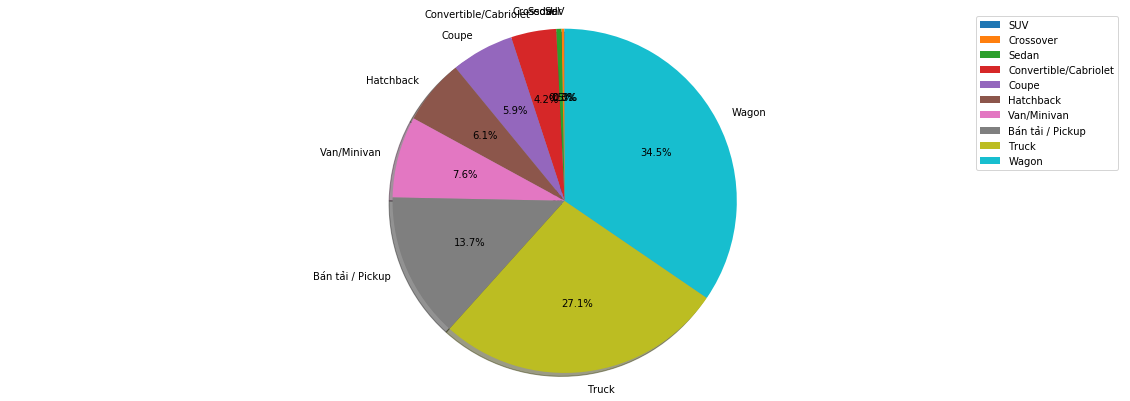

In [6]:
# Report theo kiểu xe
df_car_type = df.groupby('car_type').count()
df_car_type.sort_values(by='car_model',inplace=True)

car_type = df['car_type'].unique().tolist()

# Plot
plt.figure(figsize=(20,7))
plt.pie(df_car_type['car_model'], labels=car_type,autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.legend(car_type, loc="best")
plt.show()

Text(0.5, 1.0, 'Top 15 hãng xe bán nhiều nhất')

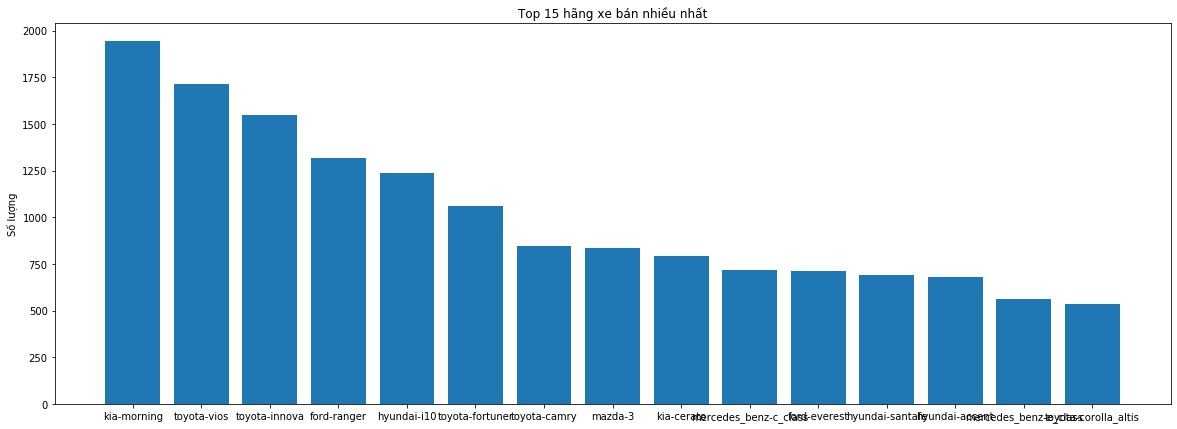

In [40]:
car_model = df['car_model'].unique().tolist()
a = []

for x in car_model:
    a.append(df['car_model'].tolist().count(x))

zip_iterator = zip(car_model, a)
a_dictionary = dict(zip_iterator)
a_dictionary = sorted(a_dictionary.items(), key=lambda x: x[1], reverse=True)

y_pos = np.arange(len(a_dictionary[0:15]))

b = a_dictionary[0:15]
x = []
y = []

for i in range(len(b)):
    x.append(b[i][0])
    y.append(b[i][1])


plt.figure(figsize=(20,7))
plt.bar(y_pos, y, align='center')
plt.xticks(y_pos, x)
plt.ylabel('Số lượng')
plt.title('Top 15 hãng xe bán nhiều nhất')

Text(0.5, 1.0, 'Top 10 màu xe bán nhiều nhất')

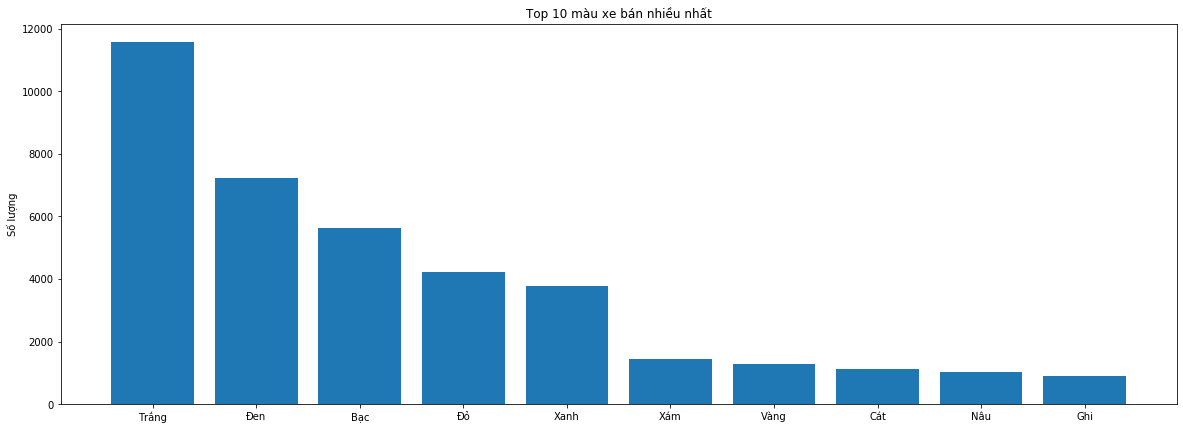

In [8]:
# Vẽ theo màu xe
car_color = df['out_color'].unique().tolist()
a = []

for x in car_color:
    a.append(df['out_color'].tolist().count(x))
    
zip_iterator = zip(car_color, a)
a_dictionary = dict(zip_iterator)
a_dictionary = sorted(a_dictionary.items(), key=lambda x: x[1], reverse=True)

y_pos = np.arange(len(a_dictionary[0:10]))

b = a_dictionary[0:10]
x = []
y = []

for i in range(len(b)):
    x.append(b[i][0])
    y.append(b[i][1])


plt.figure(figsize=(20,7))
plt.bar(y_pos, y, align='center')
plt.xticks(y_pos, x)
plt.ylabel('Số lượng')
plt.title('Top 10 màu xe bán nhiều nhất')

Text(0.5, 1.0, 'Top 10 thành phố mua bán xe nhiều nhất')

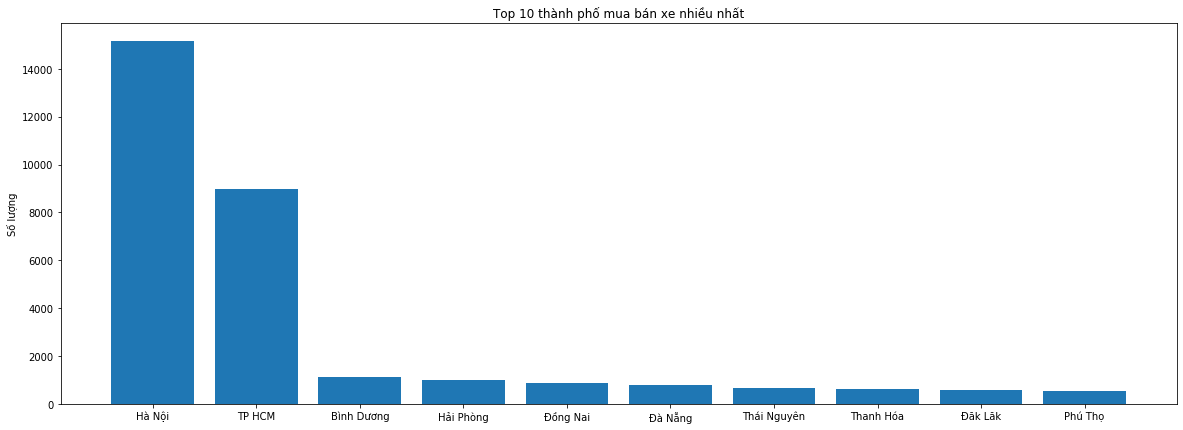

In [39]:
# Vẽ theo màu xe
area = df['area'].unique().tolist()
a = []

for x in area:
    a.append(df['area'].tolist().count(x))
    
zip_iterator = zip(area, a)
a_dictionary = dict(zip_iterator)
a_dictionary = sorted(a_dictionary.items(), key=lambda x: x[1], reverse=True)

y_pos = np.arange(len(a_dictionary[0:10]))

b = a_dictionary[0:10]
x = []
y = []

for i in range(len(b)):
    x.append(b[i][0])
    y.append(b[i][1])


plt.figure(figsize=(20,7))
plt.bar(y_pos, y, align='center')
plt.xticks(y_pos, x)
plt.ylabel('Số lượng')
plt.title('Top 10 thành phố mua bán xe nhiều nhất')

In [10]:
min_price = df['price'].min()
max_price = df['price'].max()
print(min_price,max_price)

16000000.0 65000000000.0


D:\Anaconda\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if __name__ == '__main__':


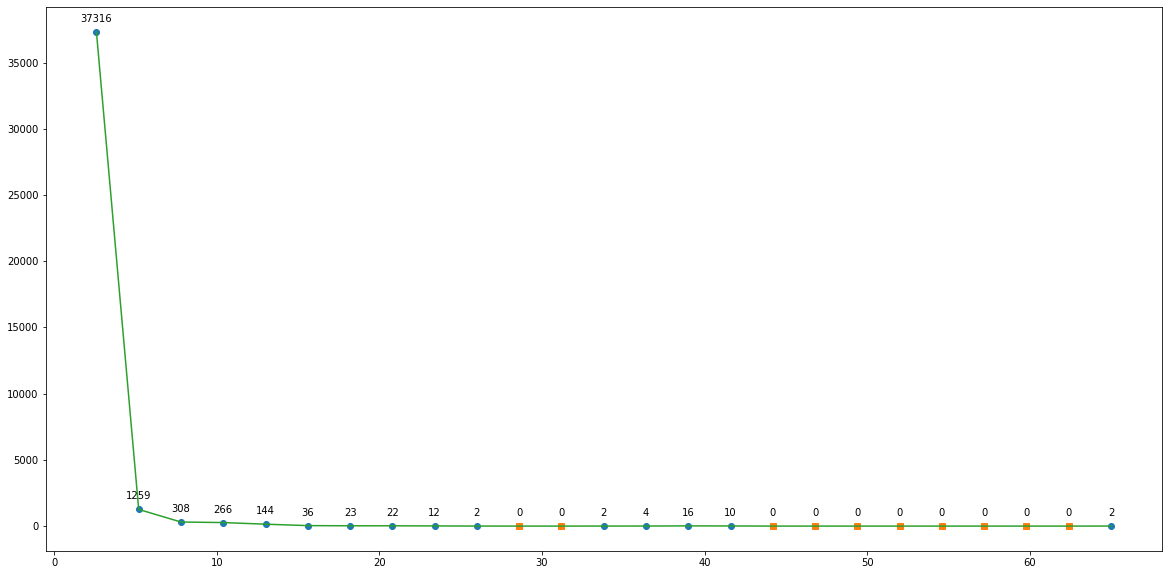

In [11]:
do_chia = max_price/25
price = []
price_label = []

for i in range(25):
    price.append((do_chia*(i+1)))
    price_label.append((do_chia*(i+1))/1e9)
    
price_range = pd.Series(index = price_label)

for j in range(25):
    price_range[price_label[j]] = int(0)

for i in range(len(df['price'])):
    for j in range(25):
        if(df['price'][i] <= float(price[j])):
            price_range[price_label[j]] =  price_range[price_label[j]]  + 1;
            break
a = price_range.index[price_range == 0].tolist()    

xs = price_label
ys = price_range

fig = plt.figure(figsize=(20,10))
ax = plt.axes()
plt.plot(price_range, 'o') 
plt.plot(price_range[a], 's') 

for x,y in zip(xs,ys):

    label = "{:.0f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

plt.plot(price_range)
plt.show()

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if __name__ == '__main__':


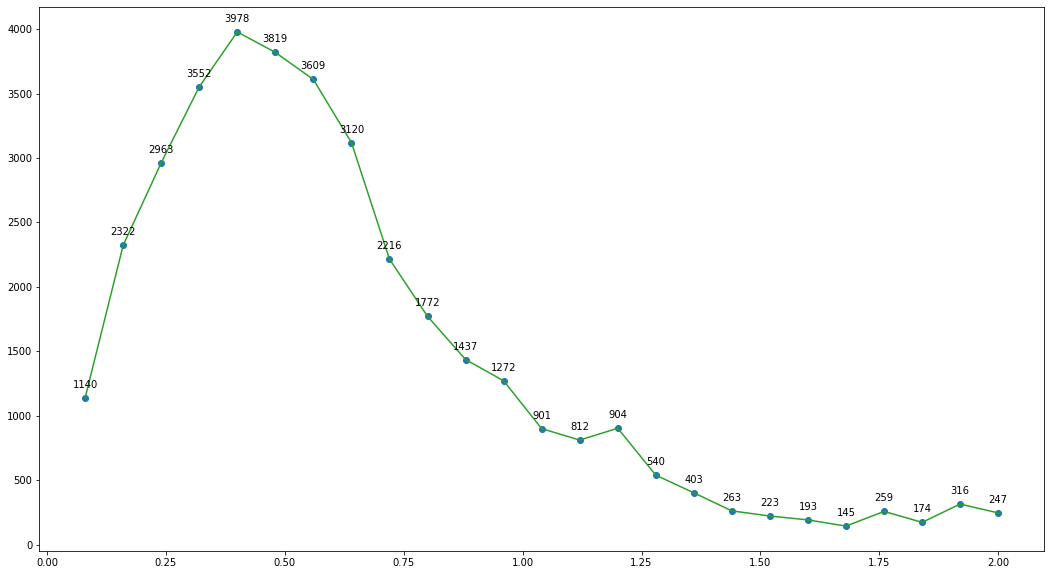

In [12]:
do_chia = 2e9/25
price = []
price_label = []

for i in range(25):
    price.append((do_chia*(i+1)))
    price_label.append((do_chia*(i+1))/1e9)
    
price_range = pd.Series(index = price_label)

for j in range(25):
    price_range[price_label[j]] = int(0)

for i in range(len(df['price'])):
    for j in range(25):
        if(df['price'][i] <= float(price[j])):
            price_range[price_label[j]] =  price_range[price_label[j]]  + 1;
            break
a = price_range.index[price_range == 0].tolist()    

xs = price_label
ys = price_range

fig = plt.figure(figsize=(18,10))
ax = plt.axes()
plt.plot(price_range, 'o') 
plt.plot(price_range[a], 's') 

for x,y in zip(xs,ys):

    label = "{:.0f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

plt.plot(price_range)
plt.show()

In [13]:
new_car_df = df[df['new_old'] == "Xe mới"]
new_car_df

,car_model,km,imp_exp,km_1,imp_exp_1,car_type,out_color,in_color,door_num,seat_num,new_old,car_year,title,price,area,poster_name,poster_add,poster_tel
3,acura-mdx,0 Km,Nhập khẩu,0 Km,Nhập khẩu,SUV,Đen,Kem,5 cửa,7 chỗ,Xe mới,2016,Acura MDX 3.5L - 2016,4.665000e+09,TP HCM,Liên hệ: Ôtô Ngọc Danh,"C3/02 Phạm Hùng, Quận 8 TP HCM",ĐT: 0919 726 666
57,audi-q5,0 Km,Nhập khẩu,0 Km,Nhập khẩu,SUV,Trắng,Nâu,5 cửa,5 chỗ,Xe mới,2019,Audi Q5 2.0 AT - 2019,2.400000e+09,Hà Nội,Liên hệ: TF1 Auto,"D5D - 103 KBT Vườn Đào,Võ Chí Công , Tây Hồ Hà...",ĐT: 0769 769 999
59,audi-q5,0 Km,Nhập khẩu,0 Km,Nhập khẩu,SUV,Trắng,Nâu,5 cửa,5 chỗ,Xe mới,2019,Audi Q5 2.0 AT - 2019,2.400000e+09,Hà Nội,Liên hệ: Vũ Dũng,"lac long quân ,tây hồ ,hà nội Hà Nội",ĐT: 0903 638 882
241,audi-Q8,0 Km,Nhập khẩu,0 Km,Nhập khẩu,SUV,Cát,Kem,5 cửa,5 chỗ,Xe mới,2019,Audi Q8 Premium Plus - 2019,4.600000e+09,Hà Nội,Liên hệ: LuxuryCar 1,437 Giải Phóng Hà Nội,ĐT: 0923 458 998
263,bmw-3_series,0 Km,Nhập khẩu,0 Km,Nhập khẩu,Sedan,Trắng,Đen,4 cửa,5 chỗ,Xe mới,2020,BMW 3 Series 320i Sport Line - 2020,1.879000e+09,Hà Nội,Liên hệ: BMW Lê Văn Lương,"68A Lê Văn Lương, phường Nhân Chính, quận Than...",ĐT: 0976 834 599 - 0912 879 858
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39352,hang_khac,0 Km,Lắp ráp trong nước,0 Km,Lắp ráp trong nước,Truck,Xanh,Đen,2 cửa,3 chỗ,Xe mới,2019,"Dothanh IZ65 3,5 tấn - 2019",4.250000e+08,Long An,Liên hệ: Hyundai Đô Thành - CN Long An,"Vòng xoay phường 4, QL 1A, Phường 4, Tân An Lo...",ĐT: 0933 403 037
39353,hang_khac,0 Km,Lắp ráp trong nước,0 Km,Lắp ráp trong nước,Truck,Xanh,Nhiều màu,2 cửa,3 chỗ,Xe mới,2019,Dothanh IZ65 Ben - 2019,4.800000e+08,Long An,Liên hệ: Hyundai Đô Thành - CN Long An,"Vòng xoay phường 4, QL 1A, Phường 4, Tân An Lo...",ĐT: 0933 403 037
39354,hang_khac,0 Km,Lắp ráp trong nước,0 Km,Lắp ráp trong nước,Truck,Xanh,Xám,2 cửa,3 chỗ,Xe mới,2019,Dothanh IZ65 - 2019,4.250000e+08,Long An,Liên hệ: Hyundai Đô Thành - CN Long An,"Vòng xoay phường 4, QL 1A, Phường 4, Tân An Lo...",ĐT: 0933 403 037
39356,hang_khac,0 Km,Lắp ráp trong nước,0 Km,Lắp ráp trong nước,Truck,Xanh,Màu khác,2 cửa,3 chỗ,Xe mới,2019,"DOTHANH IZ49 2,4T - 2019",3.800000e+08,Long An,Liên hệ: Hyundai Đô Thành - CN Long An,"Vòng xoay phường 4, QL 1A, Phường 4, Tân An Lo...",ĐT: 0933 403 037


In [14]:
new_car_type = new_car_df["car_type"].unique()
a = []

for x in new_car_type:
    a.append(new_car_df[new_car_df['car_type'] == x]['price'].mean())
    
c = zip(new_car_type,a)
d = dict(c)
sorts = sorted(d.items(), key=lambda x: x[1], reverse=True)
sorts

[('Coupe', 8687225806.451612),
 ('Convertible/Cabriolet', 4532558823.529411),
 ('SUV', 2516664852.60771),
 ('Van/Minivan', 1470876000.0),
 ('Sedan', 1077900729.4640026),
 ('Bán tải / Pickup', 954030693.069307),
 ('Crossover', 855332558.1395348),
 ('Truck', 589109404.990403),
 ('Hatchback', 561850957.5353872)]

Text(0.5, 1.0, 'Top 10 xe gía tiền cao nhất')

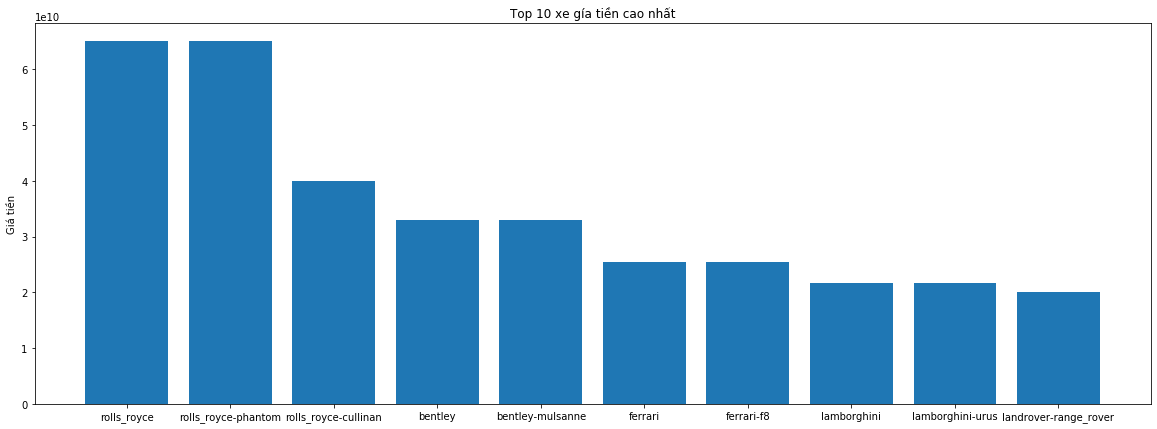

In [144]:
new_car_model = new_car_df["car_model"].unique()
a = []

for x in new_car_model:
    a.append(new_car_df[new_car_df['car_model'] == x]['price'].max())
    
c = zip(new_car_model,a)
d = dict(c)
sorts = sorted(d.items(), key=lambda x: x[1], reverse=True)

b = sorts[0:10]
x = []
y = []
y_pos = np.arange(len(b[0:10]))

for i in range(len(b)):
    x.append(b[i][0])
    y.append(b[i][1])


plt.figure(figsize=(20,7))
plt.bar(y_pos, y, align='center')
plt.xticks(y_pos, x)
plt.ylabel('Giá tiền')
plt.title('Top 10 xe gía tiền cao nhất')

In [145]:
new = df[(df['car_model'] == 'acura-mdx') & (df['new_old'] == 'Xe mới')]
old = df[(df['car_model'] == 'acura-mdx') & (df['new_old'] == 'Xe cũ')]
old = old.drop(['title', 'area','poster_name','poster_add','poster_tel','km_1','imp_exp_1'], axis=1)
old

,car_model,km,imp_exp,car_type,out_color,in_color,door_num,seat_num,new_old,car_year,price
0,acura-mdx,0 Km,Nhập khẩu,SUV,Đen,Đen,5 cửa,7 chỗ,Xe cũ,2007,6.300000e+08
1,acura-mdx,0 Km,Nhập khẩu,SUV,Bạc,Đen,5 cửa,7 chỗ,Xe cũ,2007,5.800000e+08
2,acura-mdx,0 Km,Nhập khẩu,SUV,Bạc,Nhiều màu,5 cửa,7 chỗ,Xe cũ,2006,4.650000e+08
4,acura-mdx,"9,600 Km",Nhập khẩu,SUV,Trắng,Cát,5 cửa,7 chỗ,Xe cũ,2015,3.400000e+09
5,acura-mdx,"9,700 Km",Nhập khẩu,SUV,Trắng,Kem,5 cửa,7 chỗ,Xe cũ,2015,3.450000e+09
6,acura-mdx,"86,000 Km",Nhập khẩu,SUV,Đen,Đen,5 cửa,7 chỗ,Xe cũ,2008,6.200000e+08
7,acura-mdx,0 Km,Nhập khẩu,SUV,Xanh,Nâu,5 cửa,7 chỗ,Xe cũ,2004,2.900000e+08
8,acura-mdx,"80,000 Km",Nhập khẩu,SUV,Đen,Đen,5 cửa,7 chỗ,Xe cũ,2007,5.550000e+08
9,acura-mdx,"150,000 Km",Nhập khẩu,SUV,Xám,Đen,5 cửa,7 chỗ,Xe cũ,2008,6.390000e+08
10,acura-mdx,"80,000 Km",Nhập khẩu,SUV,Đen,Đen,5 cửa,7 chỗ,Xe cũ,2007,5.550000e+08


In [370]:
feautures = []
for x in old.columns:
    if (len(old[x].unique()) == 1):
        old = old.drop([x],axis=1)

old = old.sort_values(by=['price'])    
old

,km,out_color,in_color,car_year,price
7,0 Km,Xanh,Nâu,2004,2.900000e+08
2,0 Km,Bạc,Nhiều màu,2006,4.650000e+08
12,"83,000 Km",Vàng,Vàng,2006,5.500000e+08
8,"80,000 Km",Đen,Đen,2007,5.550000e+08
10,"80,000 Km",Đen,Đen,2007,5.550000e+08
1,0 Km,Bạc,Đen,2007,5.800000e+08
14,0 Km,Đen,Đen,2008,5.900000e+08
6,"86,000 Km",Đen,Đen,2008,6.200000e+08
0,0 Km,Đen,Đen,2007,6.300000e+08
9,"150,000 Km",Xám,Đen,2008,6.390000e+08


KeyError: 0

In [ ]:
def CheckSimilar(x,y):
    if(len )